#### Importing utitlities

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#### Loading data and exploring data

In [60]:
data = pd.read_csv("./Johannesburg.csv")


In [61]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10243 non-null  object 
 1   bedrooms          8549 non-null   float64
 2   bathrooms         8610 non-null   float64
 3   Type of Property  10030 non-null  object 
 4   Erf Size          5722 non-null   object 
 5   Floor Size        5113 non-null   object 
 6   Levies            3430 non-null   object 
 7   Pool              10243 non-null  int64  
 8   Rates and Taxes   5284 non-null   object 
 9   parking space     6967 non-null   float64
 10  Pets Allowed      4483 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 880.4+ KB


None

In [62]:
display(data.describe().T)

count      mean       std  min  25%  50%  75%    max
bedrooms        8549.0  3.149433  3.968352  0.5  2.0  3.0  3.0  152.0
bathrooms       8610.0  2.164518  2.280858  0.5  1.0  2.0  2.5   80.0
Pool           10243.0  0.000000  0.000000  0.0  0.0  0.0  0.0    0.0
parking space   6967.0  2.681427  2.973883  1.0  1.0  2.0  3.0  122.0
Pets Allowed    4483.0  0.548294  0.497718  0.0  0.0  1.0  1.0    1.0

In [63]:
display(data.sample(10).T)

9449            266          9689  \
price             R 1 250 000       R 839 000  R 1 099 999   
bedrooms                  2.0             2.0          3.0   
bathrooms                 2.0             1.0          2.0   
Type of Property        House  Apartment/Flat        House   
Erf Size                740m²             NaN        667m²   
Floor Size                NaN            56m²          NaN   
Levies                    NaN           R1250          NaN   
Pool                        0               0            0   
Rates and Taxes           NaN            R250          NaN   
parking space             2.0             1.0          2.0   
Pets Allowed              NaN             NaN          NaN   

                                4119         8727         5328  \
price                   R 55 000 000  R 2 400 000  R 1 900 000   
bedrooms                         NaN          3.0          3.0   
bathrooms                        NaN          3.0          3.0   
Type of Property  IndustrialProperty        House        House   
Erf Size                         NaN       2164m²       1305m²   
Floor Size                   11508m²          NaN          NaN   
Levies                           NaN          NaN          NaN   
Pool                               0            0            0   
Rates and Taxes                  NaN        R1200        R1900   
parking space                    NaN          4.0          NaN   
Pets Allowed                     NaN          NaN          0.0   

                                       8100         8643            7693  \
price             R 2 299 000 - R 2 552 550  R 1 200 000       R 980 000   
bedrooms                                NaN          3.0             1.0   
bathrooms                               NaN          2.0             1.0   
Type of Property                        NaN        House  Apartment/Flat   
Erf Size                                NaN        297m²             NaN   
Floor Size                              NaN          NaN             NaN   
Levies                                  NaN          NaN             NaN   
Pool                                      0            0               0   
Rates and Taxes                         NaN          NaN             NaN   
parking space                           NaN          2.0             1.0   
Pets Allowed                            NaN          NaN             0.0   

                         4932  
price             R 1 420 000  
bedrooms                  3.0  
bathrooms                 2.0  
Type of Property        House  
Erf Size                495m²  
Floor Size                NaN  
Levies                    NaN  
Pool                        0  
Rates and Taxes           NaN  
parking space             2.0  
Pets Allowed              NaN

#### Pre-processing data and cleaning

##### NaN heatmap

<AxesSubplot:>

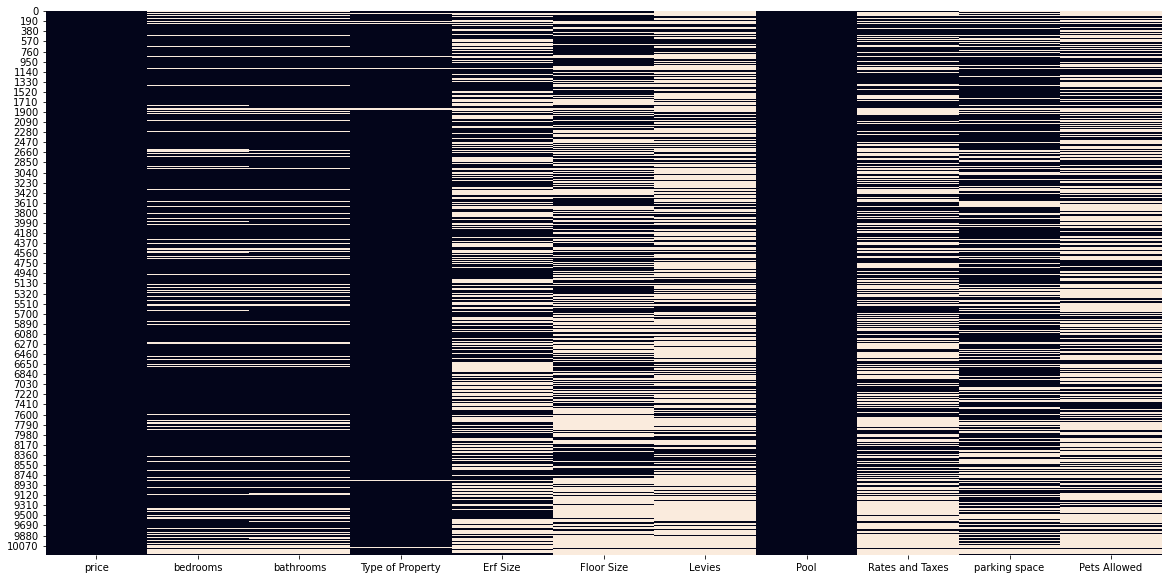

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

##### formating data special characters

In [65]:

data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')

data['erf_size'] = data['erf_size'].str.replace('m²', '')
data['erf_size'] = data['erf_size'].str.replace(' ', '')
data['erf_size'].loc[data['erf_size'].str.contains('ha', na=False)]
data['erf_size'] = data['erf_size'].str.replace('ha', '0000')
data['erf_size'] = pd.to_numeric(data['erf_size'], errors='coerce')

data['floor_size'] = data['floor_size'].str.replace('m²', '')
data['floor_size'] = data['floor_size'].str.replace(' ', '')
data['floor_size'] = pd.to_numeric(data['floor_size'], errors='coerce')

data['price'] = data['price'].str.replace('R', '')
data['price'] = data['price'].str.replace(' ', '')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

data['levies'] = data['levies'].str.replace(' ', '')
data['levies'] = data['levies'].str.replace('R', '')
data['levies'] = pd.to_numeric(data['levies'], errors='coerce')

data['rates_and_taxes'] = data['rates_and_taxes'].str.replace('R', '')
data['rates_and_taxes'] = data['rates_and_taxes'].str.replace(' ', '')
data['rates_and_taxes'] = pd.to_numeric(data['rates_and_taxes'], errors='coerce')

### Visualizing correlations

#### Correlation between features and label

<AxesSubplot:>

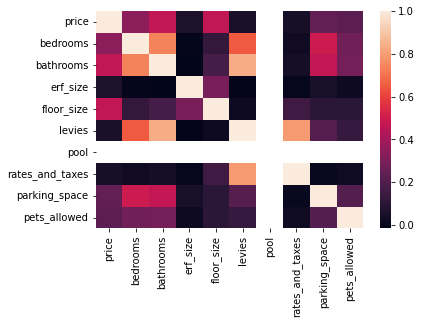

In [66]:
sns.heatmap(data.corr())

In [67]:
data.corr()['price'].sort_values(ascending=False)

price              1.000000
floor_size         0.466185
bathrooms          0.464472
bedrooms           0.343688
parking_space      0.244216
pets_allowed       0.225884
erf_size           0.060782
levies             0.052965
rates_and_taxes    0.045452
pool                    NaN
Name: price, dtype: float64

#### Correlation between features


In [68]:
data.corr()['bathrooms'].sort_values(ascending=False)
data.corr()['levies'].sort_values(ascending=False)
data.corr()['rates_and_taxes'].sort_values(ascending=False)

rates_and_taxes    1.000000
levies             0.791657
floor_size         0.152614
price              0.045452
bathrooms          0.039167
bedrooms           0.025549
pets_allowed       0.020368
parking_space      0.007024
erf_size          -0.001180
pool                    NaN
Name: rates_and_taxes, dtype: float64

### Visualizing outliers


<AxesSubplot:xlabel='price'>

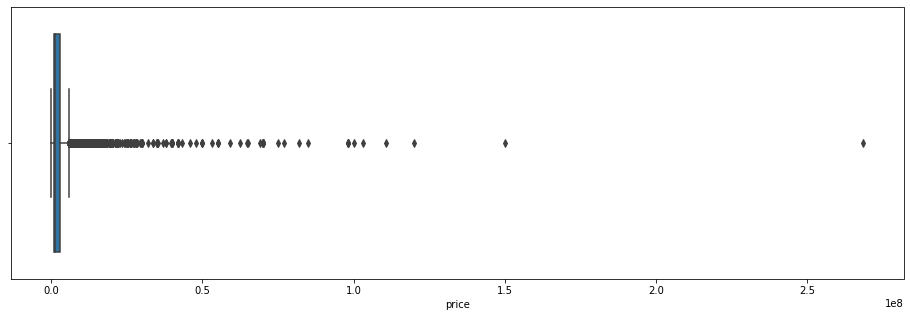

In [69]:
plt.figure(figsize=(16,5))
sns.boxplot(x=data['price'])

## Pre-processing

##### Pie Chart of type of property

<AxesSubplot:ylabel='type_of_property'>

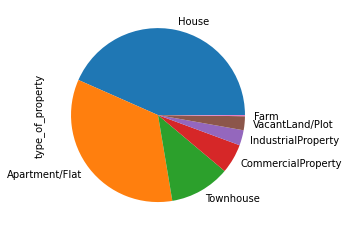

In [70]:
data['type_of_property'].value_counts().plot.pie()

#### Droping preperty of type of Farm, Industrie, commercial, vancantLand


In [71]:
data = data.drop(data.loc[data['type_of_property'] == 'CommercialProperty'].index)
data = data.drop(data.loc[data['type_of_property'] == 'Farm'].index)
data = data.drop(data.loc[data['type_of_property'] == 'VacantLand/Plot'].index)
data = data.drop(data.loc[data['type_of_property'] == 'IndustrialProperty'].index)

##### After drop

<AxesSubplot:ylabel='type_of_property'>

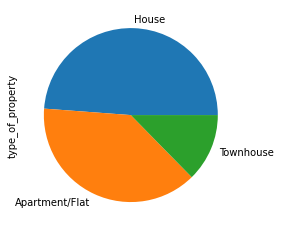

In [72]:
data['type_of_property'].value_counts().plot.pie()

##### Droping useless Levies feature because there is so many NaN

In [73]:

data = data.drop('levies', axis=1)

##### Removing outlier

In [74]:
upper_price_limit = data['price'].quantile(0.99999999)
lower_price_limit = data['price'].quantile(0.01)
data = data[(data['price'] <= upper_price_limit) & (data['price'] >= lower_price_limit)]


##### Droping NaN in type_of_property


In [75]:
data = data.drop(data.loc[data['type_of_property'].isna()].index)

##### Filling NaN value of rates and taxes of specific type of property

In [76]:
median_taxes_house = data.loc[data['type_of_property'] == 'House']['rates_and_taxes'].median()
median_taxes_appartment = data.loc[data['type_of_property'] == 'Apartment/Flat']['rates_and_taxes'].median()
median_taxes_townHouse = data.loc[data['type_of_property'] == 'Townhouse']['rates_and_taxes'].median()

data.loc[data['type_of_property'].eq('Apartment/Flat') & data['rates_and_taxes'].isna(), 'rates_and_taxes'] = median_taxes_appartment 
data.loc[data['type_of_property'].eq('Townhouse') & data['rates_and_taxes'].isna(), 'rates_and_taxes'] = median_taxes_townHouse 
data.loc[data['type_of_property'].eq('House') & data['rates_and_taxes'].isna(), 'rates_and_taxes'] = median_taxes_house 


##### Filling NaN of parkings, pets allowed

In [77]:
data.loc[data['parking_space'].isna(), 'parking_space'] = 0
data.loc[data['pets_allowed'].isna(), 'pets_allowed'] = 0

##### Transform bedrooms and bathrooms NaN to median

In [78]:
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['bedrooms'].isna(), 'bedrooms'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['bedrooms'].median()
data.loc[data['type_of_property'].eq('House') & data['bedrooms'].isna(), 'bedrooms'] = data.loc[data['type_of_property'] == 'House']['bedrooms'].median()
data.loc[data['type_of_property'].eq('Townhouse') & data['bedrooms'].isna(), 'bedrooms'] = data.loc[data['type_of_property'] == 'Townhouse']['bedrooms'].median()

median_bathrooms_house = data.loc[data['type_of_property'] == 'House']['bathrooms'].median()
median_bathrooms_appartment = data.loc[data['type_of_property'] == 'Apartment/Flat']['bathrooms'].median()
median_bathrooms_townhouse = data.loc[data['type_of_property'] == 'Townhouse']['bathrooms'].median()

data.loc[data['type_of_property'].eq('House') & data['bathrooms'].isna(), 'bathrooms'] = median_bathrooms_house
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['bathrooms'].isna(), 'bathrooms'] = median_bathrooms_appartment
data.loc[data['type_of_property'].eq('Townhouse') & data['bathrooms'].isna(), 'bathrooms'] = median_bathrooms_townhouse

##### Transform erf size and floor size NaN to median

In [79]:
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['erf_size'].isna(), 'erf_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['floor_size']
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['erf_size'].isna() & data['floor_size'].isna() , 'erf_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['erf_size'].median()
data.loc[data['type_of_property'].eq('House') & data['erf_size'].isna(), 'erf_size'] = data.loc[data['type_of_property'] == 'House']['erf_size'].median()
data.loc[data['type_of_property'].eq('Townhouse') & data['erf_size'].isna(), 'erf_size'] = data.loc[data['type_of_property'] == 'Townhouse']['erf_size'].median()
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['floor_size'].isna(), 'floor_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['erf_size']
data.loc[data['type_of_property'].eq('Apartment/Flat') & data['floor_size'].isna() & data['erf_size'].isna() , 'floor_size'] = data.loc[data['type_of_property'] == 'Apartment/Flat']['floor_size'].median()
data.loc[data['type_of_property'].eq('House') & data['floor_size'].isna(), 'floor_size'] = data.loc[data['type_of_property'] == 'House']['floor_size'].median()
data.loc[data['type_of_property'].eq('Townhouse') & data['floor_size'].isna(), 'floor_size'] = data.loc[data['type_of_property'] == 'Townhouse']['floor_size'].median()


##### Encoding

In [80]:
data["type_of_property"] = data["type_of_property"].replace(["Apartment/Flat", "House", "Townhouse"], [0,1,2])

##### Function for Finding best model parameters

In [81]:
def testModel(model , cv ,x , y , params):
    grid = GridSearchCV(estimator=model , param_grid=params , cv = cv )
    grid.fit(x , y)
    return grid.best_params_


##### Setting X and y

In [82]:
X = data.drop(["price"], axis=1)
y = data["price"]

##### Normalization

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

#### Splitting data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Testing model

##### Random Forest Regressor

In [188]:
randomForst_model = RandomForestRegressor()
cv = 5
params = {'n_estimators': [200 , 300 , 400, 500 , 600],
            'max_features':[0.1 , 0.3 , 0.6]
        }

testModel(randomForst_model , cv ,X_train , y_train, params)

In [84]:
randomForst_model = RandomForestRegressor(n_estimators=600 , max_features = 0.3)
randomForst_model.fit(X_train, y_train)
randomForest_score = randomForst_model.score(X_test, y_test)
randomForest_score

0.6357719866567624

##### Linear Regression

In [85]:
Linear_model = LinearRegression()
cv = 5
params = {'fit_intercept': [True , False],
          'n_jobs':[1,2,3]
        }

testModel(Linear_model , cv ,X_train , y_train, params)

{'fit_intercept': True, 'n_jobs': 1}

In [86]:
Linear_model = LinearRegression(fit_intercept=True , n_jobs=1)
Linear_model.fit(X_train , y_train)
LinearRegression_score = Linear_model.score(X_test , y_test)
LinearRegression_score

0.22735708324960324

Gradient Boosting Regressor

In [87]:
GradientBoost_model = GradientBoostingRegressor()
cv = 5
params = {'n_estimators': [200 , 300 , 400, 500 , 600]
        }

testModel(GradientBoost_model , cv ,X_train , y_train, params)

{'n_estimators': 400}

In [88]:
GradientBoost_model = GradientBoostingRegressor(n_estimators=500)
GradientBoost_model.fit(X_train , y_train)
GradientBooster_score = GradientBoost_model.score(X_test , y_test)
GradientBooster_score

0.6740980473294503

##### Choosing Best Model

In [89]:
def chooseModel(LinearRegression_score , GradientBooster_score , randomForest_score):
    if (LinearRegression_score <= GradientBooster_score):
        if (GradientBooster_score <= randomForest_score):
            model = randomForst_model
        else:
            model = GradientBoost_model
    else:
        if (LinearRegression_score <= randomForest_score):
            model = randomForst_model
        else:
            model = Linear_model
    return model

In [92]:
model = chooseModel(LinearRegression_score , GradientBooster_score , randomForest_score)
model

GradientBoostingRegressor(n_estimators=500)

##### Pipeline

In [94]:
#transformer  = make_column_transformer(( MinMaxScaler(), ['bedrooms', 'bathrooms' ,'Type_of_property','erf_size','floor_size','rates_and_taxes', 'parking_space',' pets_allowed']))
transformer_features = ['bedrooms', 'bathrooms' ,'type_of_property','erf_size','floor_size','rates_and_taxes', 'parking_space']
transformer_pipeline = make_pipeline(MinMaxScaler())
preprocessor = make_column_transformer((transformer_pipeline,transformer_features))
model = make_pipeline(preprocessor, 
                      RandomForestRegressor(max_features=0.3 , n_estimators=600)
                     )
model.fit(X_train , y_train)
model.score(X_test , y_test) 

0.6585213785068107

#### Creating model

In [73]:
with open("./model/johannesburg_model.pkl","wb") as file:
    pickle.dump(model, file) 